# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [115]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [116]:
# convert to datetime
ride_data_df["date"]= pd.to_datetime(ride_data_df["date"])
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12


### Merge the DataFrames

In [117]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [118]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [119]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [120]:
#  3. Get the total amount of fares for each city type
fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [121]:
#  4. Get the average fare per ride for each city type. 
# calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
avg_fare_by_type = fares_by_city_type / total_rides_by_type
avg_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [122]:
# 5. Get the average fare per driver for each city type. 
# calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
avg_driver_fare_by_type = fares_by_city_type / total_drivers_by_type
avg_driver_fare_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [123]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
            {'Total Rides':total_rides_by_type,
             'Total Drivers':total_drivers_by_type,
             'Total Fares':fares_by_city_type,
             'Average Fare per Ride':avg_fare_by_type,
             'Average Fare per Driver':avg_driver_fare_by_type}
            )
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [124]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [125]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [126]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [128]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_date_df.head(10)

date                 type    
2019-01-01 00:08:00  Urban       37.91
2019-01-01 00:46:00  Suburban    47.74
2019-01-01 02:07:00  Suburban    24.07
2019-01-01 03:46:00  Urban        7.57
2019-01-01 05:23:00  Urban       10.75
2019-01-01 09:45:00  Rural       43.69
2019-01-01 12:32:00  Suburban    25.56
2019-01-01 14:40:00  Urban        5.42
2019-01-01 14:42:00  Urban       12.31
2019-01-01 14:52:00  Suburban    31.15
Name: fare, dtype: float64

In [129]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date_df = type_date_df.reset_index()
type_date_df

,date,type,fare
0,2019-01-01 00:08:00,Urban,37.91
1,2019-01-01 00:46:00,Suburban,47.74
2,2019-01-01 02:07:00,Suburban,24.07
3,2019-01-01 03:46:00,Urban,7.57
4,2019-01-01 05:23:00,Urban,10.75
...,...,...,...
2359,2019-05-08 04:20:00,Urban,21.99
2360,2019-05-08 04:39:00,Urban,18.45
2361,2019-05-08 07:29:00,Urban,18.55
2362,2019-05-08 11:38:00,Urban,19.77


In [130]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_table = pd.pivot_table(type_date_df, values='fare', index = 'date', columns ='type')
pyber_pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [136]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
specific_pivot_table = pyber_pivot_table.loc['2019-01-01':'2019-04-29']
specific_pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [132]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
specific_pivot_table.index = pd.to_datetime(specific_pivot_table.index)

In [133]:
# 7. Check that the datatype for the index is datetime using df.info()
specific_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [134]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_pivot = specific_pivot_table.resample('W').sum()
weekly_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'Total Fare by City Type')

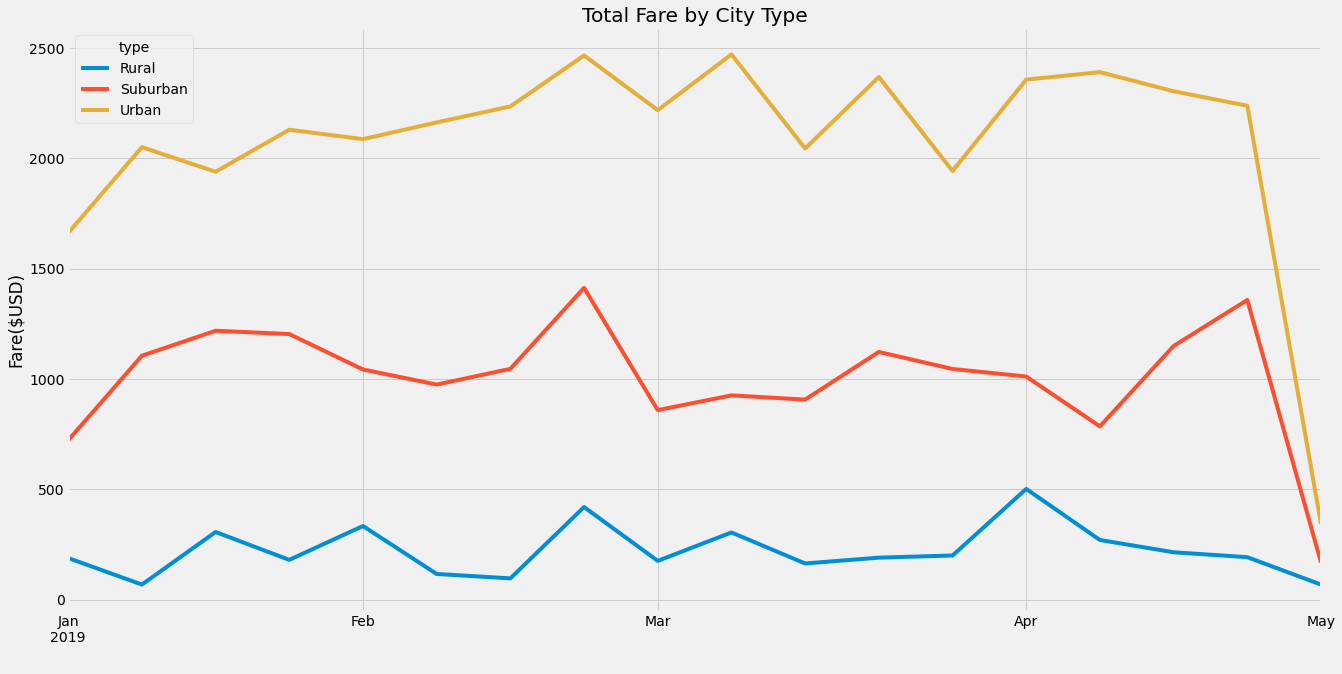

In [147]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_pivot.plot(figsize=(20,10))
plt.ylabel("Fare($USD)")
# Remove date from x label
plt.xlabel(" ")
plt.title("Total Fare by City Type")

In [112]:
plt.savefig("analysis/PyBer_fare_summary.png")

<Figure size 432x288 with 0 Axes>